# Redes recorrentes

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [9]:
bike = pd.read_csv('bike-data.csv')
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]),
 <a list of 9 Text major ticklabel objects>)

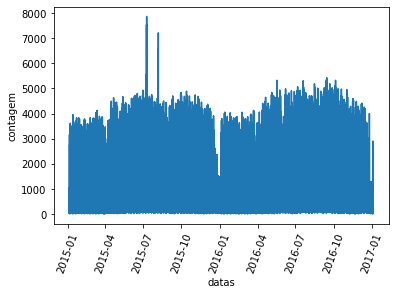

In [10]:
bike['datas'] = pd.to_datetime(bike['datas'])

sns.lineplot(x = 'datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [16]:
sc2 = StandardScaler()

sc2.fit(bike['contagem'].values.reshape(-1,1))

0    182
1    138
2    134
3     72
4     47
Name: contagem, dtype: int64

In [21]:
y = sc2.transform(bike['contagem'].values.reshape(-1, 1))

train_size = int(len(bike)*0.9)
test_size = len(bike) - train_size

y_train = y[0:train_size]
y_test = y[train_size:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]),
 <a list of 9 Text major ticklabel objects>)

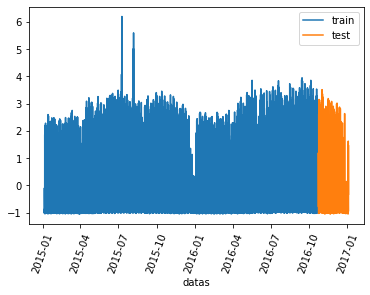

In [23]:
sns.lineplot(x='datas', y=y_train[:,0], data = bike[0:train_size], label='train')
sns.lineplot(x='datas', y=y_test[:,0], data = bike[train_size:len(bike)], label='test')
plt.xticks(rotation=70)

In [24]:
import numpy as np

def split_data(array, n_steps):
    X_new, y_new = [], []

    for i in range (n_steps, array.shape[0]):
        X_new.append(list(array.loc[i-n_steps:i-1]))
        y_new.append(array.loc[i])

    X_new, y_new = np.array(X_new), np.array(y_new)
    return X_new, y_new

In [26]:
array = pd.DataFrame(y_train)[0]
array2 = pd.DataFrame(y_test)[0]

x_train_new, y_train_new  = split_data(array, 10)
x_test_new, y_test_new = split_data(array2, 10)

In [33]:
# Adds extra dimension
x_train_new = x_train_new.reshape(x_train_new.shape[0], x_train_new.shape[1], 1)
x_test_new = x_test_new.reshape(x_test_new.shape[0], x_test_new.shape[1], 1)

In [34]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

recurrentModel = Sequential()

#LSTM = Long Short Term Memory
recurrentModel.add(LSTM(128, input_shape=(x_train_new.shape[1], x_train_new.shape[2])))
recurrentModel.add(Dense(units = 1))

recurrentModel.compile(loss='mean_squared_error', optimizer='RMSProp')
recurrentModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [35]:
result = recurrentModel.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new), epochs=100)
# print(x_train_new.shape)
# print(y_train_new.shape)
# print(x_test_new.shape)
# print(y_test_new.shape)

Epoch 1/100
490/490 [==============================] - 9s 11ms/step - loss: 0.2582 - val_loss: 0.0936
Epoch 2/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0770 - val_loss: 0.0448
Epoch 3/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0561 - val_loss: 0.0420
Epoch 4/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0466 - val_loss: 0.0351
Epoch 5/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0419 - val_loss: 0.0284
Epoch 6/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0391 - val_loss: 0.0322
Epoch 7/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0368 - val_loss: 0.0227
Epoch 8/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0348 - val_loss: 0.0256
Epoch 9/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0332 - val_loss: 0.0227
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.032

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]),
 <a list of 8 Text major ticklabel objects>)

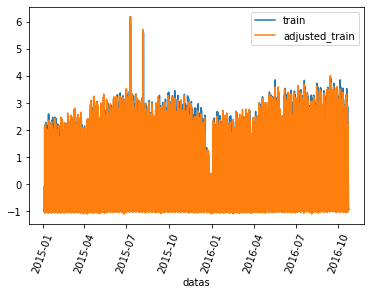

In [36]:
y_adjusted = recurrentModel.predict(x_train_new)

sns.lineplot(x='datas', y=y_train[:,0], data=bike[0:train_size], label='train')
sns.lineplot(x='datas', y=y_adjusted[:,0], data=bike[0:15662], label='adjusted_train')
plt.xticks(rotation=70)

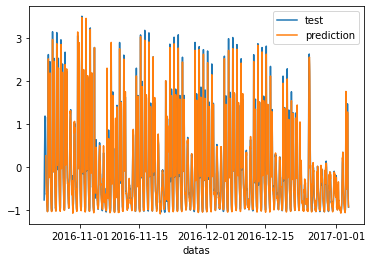

In [38]:
y_predicted = recurrentModel.predict(x_test_new)

sns.lineplot(x='datas', y=y_test[:,0], data=bike[train_size:len(bike)], label='test')
sns.lineplot(x='datas', y=y_predicted[:,0], data=bike[train_size+10:len(bike)], label='prediction')


In [40]:
from tensorflow.keras.layers import GRU

gru_model = Sequential()
gru_model.add(GRU(128, input_shape=(x_train_new.shape[1], x_train_new.shape[2])))
gru_model.add(Dense(units=1))

gru_model.compile(loss='mean_squared_error', optimizer='RMSProp')

In [41]:
recurrentModel.summary()
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               50304     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [42]:
results2 = gru_model.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new), epochs=100)

Epoch 1/100
490/490 [==============================] - 8s 11ms/step - loss: 0.2034 - val_loss: 0.0863
Epoch 2/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0688 - val_loss: 0.0449
Epoch 3/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0493 - val_loss: 0.0288
Epoch 4/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0411 - val_loss: 0.0234
Epoch 5/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0373 - val_loss: 0.0334
Epoch 6/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0351 - val_loss: 0.0213
Epoch 7/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0335 - val_loss: 0.0199
Epoch 8/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0327 - val_loss: 0.0185
Epoch 9/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0314 - val_loss: 0.0204
Epoch 10/100
490/490 [==============================] - 5s 11ms/step - loss: 0.030

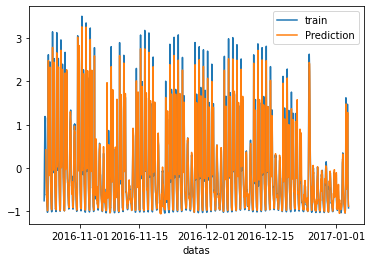

In [44]:
y_predicted2 = gru_model.predict(x_test_new)

sns.lineplot(x='datas', y=y_test[:,0], data = bike[train_size:len(bike)], label='train')
sns.lineplot(x='datas', y=y_predicted2[:,0], data = bike[train_size+10:len(bike)], label='Prediction')

In [46]:
print(results2.history.keys())

dict_keys(['loss', 'val_loss'])


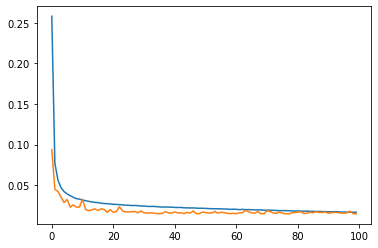

In [47]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

Text(0, 0.5, 'Cost')

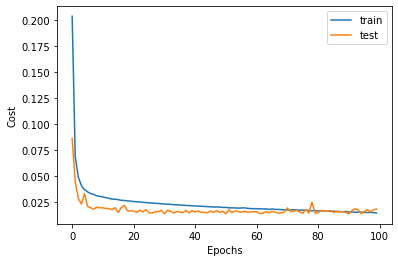

In [49]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])

plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Cost')